## DATA EXPLORATORY ANALYSIS AND HYPOTHESIS TESTING FOR INSURANCE CLAIMS DATA

### Import necessary libraries

In [39]:
import pandas as pd
import numpy as np

### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [40]:
claims = pd.read_csv('claims.csv')
cust_demographics = pd.read_csv('cust_demographics.csv')

In [41]:
claims.head()

claim_id  customer_id      incident_cause  claim_date claim_area  \
0  54004764     21868593        Driver error  11/27/2017       Auto   
1  33985796     75740424               Crime  10/03/2018       Home   
2  53522022     30308357  Other driver error  02/02/2018       Auto   
3  13015401     47830476      Natural causes  06/17/2018       Auto   
4  22890252     19269962               Crime  01/13/2018       Auto   

  police_report     claim_type claim_amount  total_policy_claims fraudulent  
0            No  Material only        $2980                  1.0         No  
1       Unknown  Material only        $2980                  3.0         No  
2            No  Material only      $3369.5                  1.0        Yes  
3            No  Material only        $1680                  1.0         No  
4            No  Material only        $2680                  1.0         No

In [42]:
cust_demographics.head()

CUST_ID  gender DateOfBirth State       Contact   Segment
0  21868593  Female   12-Jan-79    VT  789-916-8172  Platinum
1  75740424  Female   13-Jan-70    ME  265-543-1264    Silver
2  30308357  Female   11-Mar-84    TN  798-631-4758    Silver
3  47830476  Female   01-May-86    MA  413-187-7945    Silver
4  19269962    Male   13-May-77    NV  956-871-8691      Gold

In [43]:
combined_data = pd.merge(left = claims, right = cust_demographics, left_on = 'customer_id', right_on = 'CUST_ID', how = 'left')
combined_data.drop(columns = ["CUST_ID"], inplace = True)
combined_data.head()

claim_id  customer_id      incident_cause  claim_date claim_area  \
0  54004764     21868593        Driver error  11/27/2017       Auto   
1  33985796     75740424               Crime  10/03/2018       Home   
2  53522022     30308357  Other driver error  02/02/2018       Auto   
3  13015401     47830476      Natural causes  06/17/2018       Auto   
4  22890252     19269962               Crime  01/13/2018       Auto   

  police_report     claim_type claim_amount  total_policy_claims fraudulent  \
0            No  Material only        $2980                  1.0         No   
1       Unknown  Material only        $2980                  3.0         No   
2            No  Material only      $3369.5                  1.0        Yes   
3            No  Material only        $1680                  1.0         No   
4            No  Material only        $2680                  1.0         No   

   gender DateOfBirth State       Contact   Segment  
0  Female   12-Jan-79    VT  789-916-8172  Platinum  
1  Female   13-Jan-70    ME  265-543-1264    Silver  
2  Female   11-Mar-84    TN  798-631-4758    Silver  
3  Female   01-May-86    MA  413-187-7945    Silver  
4    Male   13-May-77    NV  956-871-8691      Gold

### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [44]:
combined_data.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

In [45]:
# Changing data type of "claim_date" and "DateOfBirth" columns from object to datetime.

combined_data['claim_date'] = pd.to_datetime(combined_data['claim_date'], format = '%m/%d/%Y')
combined_data['DateOfBirth'] = pd.to_datetime(combined_data['DateOfBirth'], format = '%d-%b-%y')
combined_data.loc[combined_data['DateOfBirth'].dt.year > combined_data['claim_date'].dt.year, 'DateOfBirth'] = combined_data['DateOfBirth'] - pd.offsets.DateOffset(years = 100)
combined_data.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
dtype: object

In [46]:
combined_data.head(10)

claim_id  customer_id      incident_cause claim_date claim_area  \
0  54004764     21868593        Driver error 2017-11-27       Auto   
1  33985796     75740424               Crime 2018-10-03       Home   
2  53522022     30308357  Other driver error 2018-02-02       Auto   
3  13015401     47830476      Natural causes 2018-06-17       Auto   
4  22890252     19269962               Crime 2018-01-13       Auto   
5  24050443     21831191  Other driver error 2017-10-04       Auto   
6  12878692     18401412        Driver error 2018-01-13       Auto   
7  27026412     73486606      Natural causes 2018-04-10       Auto   
8  43908336     32813689               Crime 2018-02-15       Auto   
9  63246959     33507197               Crime 2017-07-22       Auto   

  police_report     claim_type claim_amount  total_policy_claims fraudulent  \
0            No  Material only        $2980                  1.0         No   
1       Unknown  Material only        $2980                  3.0         No   
2            No  Material only      $3369.5                  1.0        Yes   
3            No  Material only        $1680                  1.0         No   
4            No  Material only        $2680                  1.0         No   
5            No    Injury only     $38306.5                  3.0        Yes   
6            No  Material only        $1730                  4.0         No   
7            No  Material only        $1160                  3.0         No   
8       Unknown  Material only        $2620                  1.0         No   
9            No  Material only      $2748.5                  2.0        Yes   

   gender DateOfBirth State       Contact   Segment  
0  Female  1979-01-12    VT  789-916-8172  Platinum  
1  Female  1970-01-13    ME  265-543-1264    Silver  
2  Female  1984-03-11    TN  798-631-4758    Silver  
3  Female  1986-05-01    MA  413-187-7945    Silver  
4    Male  1977-05-13    NV  956-871-8691      Gold  
5    Male  1977-05-17    NH  419-712-8513      Gold  
6    Male  1999-03-02    AR  752-398-2914      Gold  
7    Male  1999-10-25    AK  256-968-9172    Silver  
8    Male  1993-10-12    ID  142-324-7481    Silver  
9  Female  1966-09-09    RI  165-519-4583      Gold

### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [47]:
combined_data['claim_amount'] = combined_data['claim_amount'].str.replace('$', '', regex=False).astype(float)
combined_data.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float64
total_policy_claims           float64
fraudulent                     object
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
dtype: object

### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [48]:
combined_data['alert_flag'] = np.where(combined_data['police_report'] == 'Yes', 1, 0)
combined_data.head()

claim_id  customer_id      incident_cause claim_date claim_area  \
0  54004764     21868593        Driver error 2017-11-27       Auto   
1  33985796     75740424               Crime 2018-10-03       Home   
2  53522022     30308357  Other driver error 2018-02-02       Auto   
3  13015401     47830476      Natural causes 2018-06-17       Auto   
4  22890252     19269962               Crime 2018-01-13       Auto   

  police_report     claim_type  claim_amount  total_policy_claims fraudulent  \
0            No  Material only        2980.0                  1.0         No   
1       Unknown  Material only        2980.0                  3.0         No   
2            No  Material only        3369.5                  1.0        Yes   
3            No  Material only        1680.0                  1.0         No   
4            No  Material only        2680.0                  1.0         No   

   gender DateOfBirth State       Contact   Segment  alert_flag  
0  Female  1979-01-12    VT  789-916-8172  Platinum           0  
1  Female  1970-01-13    ME  265-543-1264    Silver           0  
2  Female  1984-03-11    TN  798-631-4758    Silver           0  
3  Female  1986-05-01    MA  413-187-7945    Silver           0  
4    Male  1977-05-13    NV  956-871-8691      Gold           0

### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. 
### Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [49]:
combined_data = combined_data.sort_values(by = 'claim_date', ascending = True, ignore_index = True)
combined_data = combined_data.drop_duplicates(subset = 'customer_id', keep = 'last', ignore_index = True)
combined_data.head()

claim_id  customer_id incident_cause claim_date claim_area police_report  \
0   9476314     65176092   Other causes 2017-01-01       Auto            No   
1  36457152     25634799   Driver error 2017-01-01       Auto            No   
2  61374372     77219712   Other causes 2017-01-01       Auto            No   
3  97666948     97514724   Driver error 2017-01-01       Home            No   
4  70512964     22756942   Driver error 2017-01-01       Auto           Yes   

            claim_type  claim_amount  total_policy_claims fraudulent  gender  \
0  Material and injury       37290.0                  3.0         No    Male   
1        Material only        2900.0                  2.0         No  Female   
2  Material and injury       20200.0                  1.0         No  Female   
3          Injury only       19120.0                  1.0         No    Male   
4          Injury only       20310.0                  1.0         No    Male   

  DateOfBirth State       Contact   Segment  alert_flag  
0  1975-11-23    NC  651-379-2486    Silver           0  
1  1974-11-04    KS  724-781-3692  Platinum           0  
2  1999-08-05    NH  649-592-8793  Platinum           0  
3  1969-06-08    FL  641-684-7986  Platinum           0  
4  1982-10-09    FL  462-823-3126    Silver           1

### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [50]:
combined_data.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
alert_flag              0
dtype: int64

In [51]:
combined_data['claim_amount'].fillna(value = combined_data['claim_amount'].mean(), inplace = True)
combined_data['total_policy_claims'].fillna(value = combined_data['total_policy_claims'].mean(), inplace = True)
combined_data['gender'].fillna(value = combined_data['gender'].mode()[0], inplace = True)
combined_data['DateOfBirth'].fillna(value = combined_data['DateOfBirth'].mode()[0], inplace = True)
combined_data['State'].fillna(value = combined_data['State'].mode()[0], inplace = True)
combined_data['Contact'].fillna(value = combined_data['Contact'].mode()[0], inplace = True)
combined_data['Segment'].fillna(value = combined_data['Segment'].mode()[0], inplace = True)

combined_data.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
alert_flag             0
dtype: int64

### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
### Children < 18
### Youth 18-30
### Adult 30-60
### Senior > 60

In [52]:
combined_data['Age'] = combined_data['claim_date'].dt.year - combined_data['DateOfBirth'].dt.year
combined_data.loc[combined_data['claim_date'].dt.month < combined_data['DateOfBirth'].dt.month, 'Age'] = combined_data['Age'] - 1
combined_data.loc[(combined_data['claim_date'].dt.month == combined_data['DateOfBirth'].dt.month) & (combined_data['claim_date'].dt.day < combined_data['DateOfBirth'].dt.day), 'Age'] = combined_data['Age'] - 1
combined_data.loc[combined_data['Age'] < 18, 'Age_category'] = 'Children'
combined_data.loc[(combined_data['Age'] >= 18) & (combined_data['Age'] < 30),'Age_category'] = 'Youth'
combined_data.loc[(combined_data['Age'] >= 30) & (combined_data['Age'] < 60),'Age_category'] = 'Adult' 
combined_data.loc[combined_data['Age'] >= 60, 'Age_category'] = 'Senior'

combined_data.head()

claim_id  customer_id incident_cause claim_date claim_area police_report  \
0   9476314     65176092   Other causes 2017-01-01       Auto            No   
1  36457152     25634799   Driver error 2017-01-01       Auto            No   
2  61374372     77219712   Other causes 2017-01-01       Auto            No   
3  97666948     97514724   Driver error 2017-01-01       Home            No   
4  70512964     22756942   Driver error 2017-01-01       Auto           Yes   

            claim_type  claim_amount  total_policy_claims fraudulent  gender  \
0  Material and injury       37290.0                  3.0         No    Male   
1        Material only        2900.0                  2.0         No  Female   
2  Material and injury       20200.0                  1.0         No  Female   
3          Injury only       19120.0                  1.0         No    Male   
4          Injury only       20310.0                  1.0         No    Male   

  DateOfBirth State       Contact   Segment  alert_flag  Age Age_category  
0  1975-11-23    NC  651-379-2486    Silver           0   41        Adult  
1  1974-11-04    KS  724-781-3692  Platinum           0   42        Adult  
2  1999-08-05    NH  649-592-8793  Platinum           0   17     Children  
3  1969-06-08    FL  641-684-7986  Platinum           0   47        Adult  
4  1982-10-09    FL  462-823-3126    Silver           1   34        Adult

### 8. What is the average amount claimed by the customers from various segments?

In [53]:
combined_data.groupby('Segment')['claim_amount'].mean().reset_index()

Segment  claim_amount
0      Gold  12761.663185
1  Platinum  12370.565077
2    Silver  12265.736955

### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [103]:
combined_data[combined_data['claim_date'] <= '2018-09-10'].groupby('incident_cause')['claim_amount'].sum().round(2).reset_index()

incident_cause  claim_amount
0               Crime     726959.50
1        Driver error    3344545.99
2      Natural causes    1315301.00
3        Other causes    3778023.49
4  Other driver error    3342802.99

### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [102]:
len(combined_data[(combined_data['Age_category'] == 'Adult') & (combined_data['State'].isin(['TX', 'DE', 'AK'])) & (combined_data['incident_cause'].isin(['Driver error', 'Other driver error']))])

23

### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

<AxesSubplot:title={'center':'Gender-wise Claims for Different Segments'}, ylabel='claim_amount'>

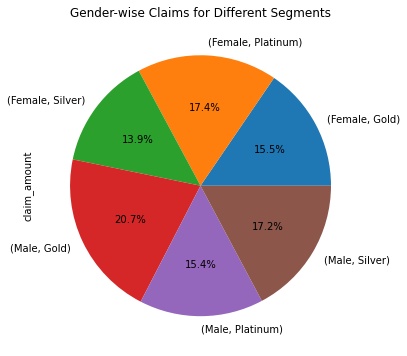

In [79]:
combined_data.groupby(['gender', 'Segment'])['claim_amount'].sum().plot(kind = 'pie', autopct = '%.1f%%', figsize = (6, 6), title = 'Gender-wise Claims for Different Segments')

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart.

<AxesSubplot:title={'center':'Gender-wise Claims For Driver Related Issues'}, xlabel='gender'>

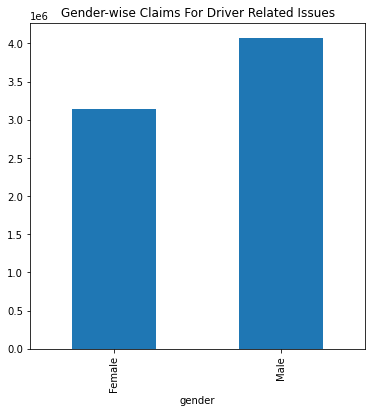

In [101]:
combined_data[combined_data['incident_cause'].isin(['Driver error', 'Other driver error'])].groupby(['gender'])['claim_amount'].sum().plot(kind = 'bar', figsize = (6, 6), title = 'Gender-wise Claims For Driver Related Issues')

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

<AxesSubplot:title={'center':'Age Group Wise Fraudulent Policy Claims'}, xlabel='Age_category'>

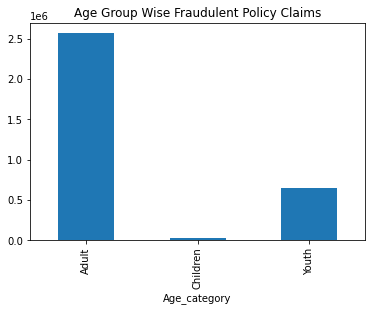

In [100]:
combined_data[combined_data['fraudulent'] == 'Yes'].groupby('Age_category')['claim_amount'].sum().plot.bar(title = 'Age Group Wise Fraudulent Policy Claims')

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.